*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 21-1:  Linear regression for taxi data.

This assignment uses the green taxi trip dataset, and will look at the relationship between the trip distance and the total fare amount (stored in the column `total_amount`).

1) Filter your dataframe to remove all trips longer than 100 miles.

2) Using trip distance as the independent variable (x) and the total fare amount as the dependent variable (y), do the following:

    a) compute a linear model
    
    b) plot the scatter plot with the regression line

    c) plot the histogram of the residuals from (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

Step 1: Load the data and filter to remove all trips longer than 100 miles

In [2]:
taxi_unfiltered = pd.read_csv("../../Data/Sept1_2021_Green_Taxi_Trip_Data.csv")
taxi_unfiltered.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,09/01/2021 12:00:11 AM,09/01/2021 12:01:39 AM,N,1.0,74,74,1.0,0.02,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.00
1,2,09/01/2021 12:00:26 AM,09/01/2021 12:09:38 AM,N,1.0,95,56,1.0,1.41,8.0,0.5,0.5,1.00,0.0,NaN,0.3,10.30,1.0,1.0,0.00
2,2,09/01/2021 12:01:27 AM,09/01/2021 12:23:14 AM,N,1.0,93,256,1.0,11.07,31.5,0.5,0.5,6.56,0.0,NaN,0.3,39.36,1.0,1.0,0.00
3,1,09/01/2021 12:01:31 AM,09/01/2021 12:15:14 AM,N,1.0,255,36,1.0,2.80,11.5,1.0,0.5,3.95,0.0,NaN,0.3,17.25,1.0,1.0,0.00
4,2,09/01/2021 12:02:08 AM,09/01/2021 12:24:51 AM,N,5.0,93,144,4.0,10.64,65.0,0.0,0.0,0.00,0.0,NaN,0.3,68.05,2.0,2.0,2.75


In [3]:
long_trip_filter = taxi_unfiltered["trip_distance"] <= 100
taxi = taxi_unfiltered[long_trip_filter]

Step 2: Compute a linear regression with trip distance as the independent variable and total amount as the dependent variable.

In [4]:
lm = smf.ols(formula = 'total_amount ~ trip_distance', data = taxi).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     7721.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:37:12   Log-Likelihood:                -10549.
No. Observations:                2867   AIC:                         2.110e+04
Df Residuals:                    2865   BIC:                         2.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0856      0.241     45.981      0.000      10.613      11.558
trip_distance     2.9029      0.033     87.868      0.000       2.838       2.968
==============================================================================
Omnibus:                      975.028   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           288130.849
Skew:                          -0.126   Prob(JB):                         0.00
Kurtosis:                      52.111   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Relationship between green taxi trip distance and total fare amount')

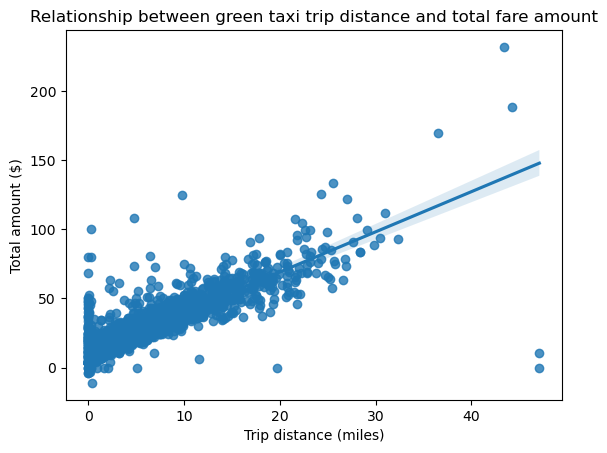

In [6]:
sns.regplot(x = "trip_distance", y = "total_amount",data = taxi)
plt.xlabel("Trip distance (miles)")
plt.ylabel("Total amount ($)")
plt.title("Relationship between green taxi trip distance and total fare amount")

Text(0, 0.5, 'Frequency')

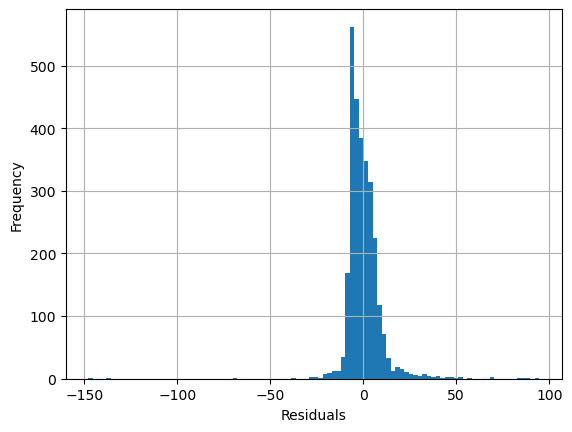

In [7]:
lm.resid.hist(bins = 100)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

1. What is the equation of the linear regression line?
2. Based on the histgram of the residuals, is the linear model a good fit?  That is, do the residuals appear to have a normal distribution?
3.  According to your linear model, for each mile increase in the trip distance, how much does the total fare incease by?

Write your answers below.

1. y = 2.9029x + 11.0856
2. Yes, the residuals have an approximately normal distribution, so the model appears to be a good fit.
3. $2.90